In [2]:
!wget http://4ce34574.ngrok.io/dataset.zip

--2019-01-04 03:03:48--  http://4ce34574.ngrok.io/dataset.zip
Resolving 4ce34574.ngrok.io (4ce34574.ngrok.io)... 52.15.183.149, 2600:1f16:59e:b200:680c:4438:abfa:fc7a
Connecting to 4ce34574.ngrok.io (4ce34574.ngrok.io)|52.15.183.149|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62188368 (59M) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]  59.31M   545KB/s    in 69s     

2019-01-04 03:04:58 (879 KB/s) - ‘dataset.zip’ saved [62188368/62188368]



In [0]:
!unzip dataset.zip

In [4]:
ls

dataset/  dataset.zip  sample_data/


In [1]:
import numpy as np
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt

import keras

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD, RMSprop, adadelta, Adam

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import math
import cv2
from keras import backend as K
from keras.applications import vgg16

/home/praneet/envs/deeplearning/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
img_rows = 128
img_cols = 128
num_channels = 3
epochs = 5
num_classes = 3

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=(1, 1),
                 activation='relu', input_shape=(img_rows, img_cols, num_channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(312, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 312)               31310136  
__________

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        shear_range=0.4,
        zoom_range=0.5,
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        # randomly rotate images in the range (degrees, 0 to 180)
        rotation_range=180,
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.4,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.4,
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

test_datagen = ImageDataGenerator(
        rescale=1./255,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        shear_range=0.4,
        zoom_range=0.5,
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        # randomly rotate images in the range (degrees, 0 to 180)
        rotation_range=180,
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.4,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.4,
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(img_rows, img_cols),
        color_mode="rgb",
        batch_size=32,
        class_mode="categorical",
        shuffle=True,)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(img_rows, img_cols),
        color_mode="rgb",
        batch_size=32,
        class_mode="categorical",
        shuffle=True,)

Found 4500 images belonging to 3 classes.
Found 2152 images belonging to 3 classes.


In [5]:
augmented_checkpoint = ModelCheckpoint('augmented_best_model.hdf5',  # model filename
                                       monitor='val_loss',  # quantity to monitor
                                       verbose=1,  # verbosity - 0 or 1
                                       save_best_only=True,  # The latest best model will not be overwritten
                                       mode='auto')  # The decision to overwrite model is made
# automatically depending on the quantity to monitor

In [6]:
model.compile(loss=keras.losses.categorical_crossentropy,  # Better loss function for neural networks
              optimizer=keras.optimizers.Adam(),  # Adam optimizer with 1.0e-4 learning rate
              metrics=['accuracy'])  # Metrics to be evaluated by the model

In [7]:
model.fit_generator(generator=train_generator,
                    validation_data=test_generator,
                    epochs=epochs,
                    callbacks=[augmented_checkpoint],
                    verbose=1,
                    steps_per_epoch=128,
                    validation_steps=64,
)

Epoch 1/5
128/128 [==============================] - 126s 985ms/step - loss: 1.1017 - acc: 0.4275 - val_loss: 1.2621 - val_acc: 0.3779

Epoch 00001: val_loss improved from inf to 1.26206, saving model to augmented_best_model.hdf5
Epoch 2/5
128/128 [==============================] - 105s 820ms/step - loss: 1.0516 - acc: 0.4470 - val_loss: 1.2683 - val_acc: 0.2564

Epoch 00002: val_loss did not improve from 1.26206
Epoch 3/5
128/128 [==============================] - 107s 838ms/step - loss: 1.0261 - acc: 0.4723 - val_loss: 1.2071 - val_acc: 0.2673

Epoch 00003: val_loss improved from 1.26206 to 1.20711, saving model to augmented_best_model.hdf5
Epoch 4/5
128/128 [==============================] - 103s 808ms/step - loss: 1.0302 - acc: 0.4659 - val_loss: 1.4021 - val_acc: 0.2283

Epoch 00004: val_loss did not improve from 1.20711
Epoch 5/5
128/128 [==============================] - 103s 806ms/step - loss: 1.0111 - acc: 0.4877 - val_loss: 1.3575 - val_acc: 0.1680

Epoch 00005: val_loss did 

In [10]:
image = cv2.imread('dataset/train/Early_blight/0114f7b3-7f56-4bef-aa47-7a82da142d4b___RS_Erly.B 7437_final_masked.jpg')

image = image[np.newaxis,...]

In [8]:
def read_layer(model, x, layer_name):
    """Return the activation values for the specifid layer"""
    # Create Keras function to read the output of a specific layer
    get_layer_output = K.function([model.layers[0].input], [model.get_layer(layer_name).output])
    outputs = get_layer_output([x])[0]
    tensor_summary(outputs)
    return outputs[0]
    
def view_layer(model, x, layer_name, cols=5):
    outputs = read_layer(model, x, layer_name)
    display_images([outputs[:,:,i] for i in range(10)], cols=cols)

def tensor_summary(tensor):
    """Display shape, min, and max values of a tensor."""
    print("shape: {}  min: {}  max: {}".format(tensor.shape, tensor.min(), tensor.max()))

    
def normalize(image):
    """Takes a tensor of 3 dimensions (height, width, colors) and normalizes it's values
    to be between 0 and 1 so it's suitable for displaying as an image."""
    image = image.astype(np.float32)
    return (image - image.min()) / (image.max() - image.min() + 1e-5)


def display_images(images, titles=None, cols=5, interpolation=None, cmap="Greys_r"):
    """
    images: A list of images. I can be either:
        - A list of Numpy arrays. Each array represents an image.
        - A list of lists of Numpy arrays. In this case, the images in
          the inner lists are concatentated to make one image.
    """
    titles = titles or [""] * len(images)
    rows = math.ceil(len(images) / cols)
    height_ratio = 1.2 * (rows/cols) * (0.5 if type(images[0]) is not np.ndarray else 1)
    plt.figure(figsize=(15, 15 * height_ratio))
    i = 1
    for image, title in zip(images, titles):
        plt.subplot(rows, cols, i)
        plt.axis("off")
        # Is image a list? If so, merge them into one image.
        if type(image) is not np.ndarray:
            image = [normalize(g) for g in image]
            image = np.concatenate(image, axis=1)
        else:
            image = normalize(image)
        plt.title(title, fontsize=9)
        plt.imshow(image, cmap=cmap, interpolation=interpolation)
        i += 1

shape: (1, 125, 125, 64)  min: 0.0  max: 169.07644653320312


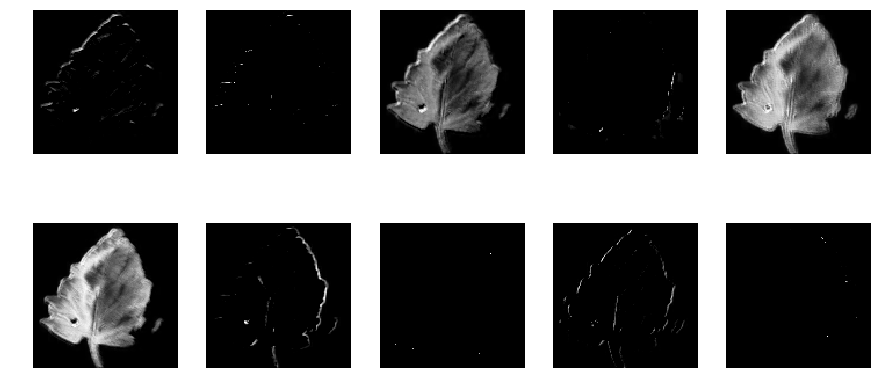

In [23]:
view_layer(model, image, "conv2d_2")